In [33]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
pd.set_option('display.max_rows', None)


In [49]:
#coffea_caff_clim = pd.read_csv(r"..\data\coll_caff_node_clim_w_class.csv")
coffea_caff = pd.read_csv(r"..\data\coll_caff_node_w_class.csv")

coffee_data = coffea_caff.copy()

coffee_data.drop(columns=['specimen_id','longitude','latitude', 'source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded'],inplace=True)



In [50]:
coffee_data

,clim_1_tmin1_Monthly minimum temperature - January (°C x 10),clim_2_tmin2_Monthly minimum temperature - February (°C x 10),clim_3_tmin3_Monthly minimum temperature - March (°C x 10),clim_4_tmin4_Monthly minimum temperature - April (°C x 10),clim_5_tmin5_Monthly minimum temperature - May (°C x 10),clim_6_tmin6_Monthly minimum temperature - June (°C x 10),clim_7_tmin7_Monthly minimum temperature - July (°C x 10),clim_8_tmin8_Monthly minimum temperature - August (°C x 10),clim_9_tmin9_Monthly minimum temperature - September (°C x 10),clim_10_tmin10_Monthly minimum temperature - October (°C x 10),...,env_78_wat_Watersheds_RetDisp_Manampatrana,env_78_wat_Watersheds_RetDisp_Mananara_du_Sud,env_78_wat_Watersheds_RetDisp_Mandrare,env_78_wat_Watersheds_RetDisp_Mangoky,env_78_wat_Watersheds_RetDisp_Mangoro,env_78_wat_Watersheds_RetDisp_Onilahy,env_78_wat_Watersheds_RetDisp_Sambirano,env_78_wat_Watersheds_RetDisp_Tsiribihina,env_78_wat_Watersheds__nodata,caffeine_class
0,156.0,198.0,186.0,160.0,133.0,118.0,109.0,115.0,133.0,180.0,...,0,0,0,0,0,0,0,0,0,Absent
1,184.0,218.0,216.0,211.0,194.0,177.0,171.0,170.0,173.0,199.0,...,0,0,0,0,0,0,0,0,0,Low
2,161.0,203.0,192.0,174.0,127.0,113.0,112.0,122.0,136.0,179.0,...,0,0,0,0,0,0,0,0,0,Absent
3,161.0,203.0,192.0,174.0,127.0,113.0,112.0,122.0,136.0,179.0,...,0,0,0,0,0,0,0,0,0,Absent
4,161.0,203.0,192.0,174.0,127.0,113.0,112.0,122.0,136.0,179.0,...,0,0,0,0,0,0,0,0,0,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,156.0,192.0,185.0,169.0,136.0,116.0,115.0,123.0,134.0,173.0,...,0,1,0,0,0,0,0,0,0,Absent
522,204.0,226.0,229.0,222.0,204.0,184.0,174.0,181.0,189.0,218.0,...,0,0,0,0,0,0,0,0,0,Absent
523,200.0,225.0,222.0,219.0,204.0,185.0,181.0,183.0,188.0,215.0,...,0,0,0,0,0,0,0,0,0,Absent
524,200.0,225.0,222.0,219.0,204.0,185.0,181.0,183.0,188.0,215.0,...,0,0,0,0,0,0,0,0,0,Absent


In [51]:
coffee_data.describe()

,clim_1_tmin1_Monthly minimum temperature - January (°C x 10),clim_2_tmin2_Monthly minimum temperature - February (°C x 10),clim_3_tmin3_Monthly minimum temperature - March (°C x 10),clim_4_tmin4_Monthly minimum temperature - April (°C x 10),clim_5_tmin5_Monthly minimum temperature - May (°C x 10),clim_6_tmin6_Monthly minimum temperature - June (°C x 10),clim_7_tmin7_Monthly minimum temperature - July (°C x 10),clim_8_tmin8_Monthly minimum temperature - August (°C x 10),clim_9_tmin9_Monthly minimum temperature - September (°C x 10),clim_10_tmin10_Monthly minimum temperature - October (°C x 10),...,env_78_wat_Watersheds_RetDisp_Mahavavy,env_78_wat_Watersheds_RetDisp_Manampatrana,env_78_wat_Watersheds_RetDisp_Mananara_du_Sud,env_78_wat_Watersheds_RetDisp_Mandrare,env_78_wat_Watersheds_RetDisp_Mangoky,env_78_wat_Watersheds_RetDisp_Mangoro,env_78_wat_Watersheds_RetDisp_Onilahy,env_78_wat_Watersheds_RetDisp_Sambirano,env_78_wat_Watersheds_RetDisp_Tsiribihina,env_78_wat_Watersheds__nodata
count,515.000000,515.000000,515.000000,515.000000,515.00000,515.000000,515.000000,515.000000,515.000000,515.000000,...,526.0,526.0,526.000000,526.000000,526.000000,526.000000,526.0,526.0,526.0,526.000000
mean,179.714563,212.840777,208.559223,197.733981,173.96699,156.644660,152.333981,154.899029,164.207767,196.256311,...,0.0,0.0,0.003802,0.003802,0.003802,0.001901,0.0,0.0,0.0,0.028517
std,25.754719,20.086822,20.855485,25.045350,30.25284,30.848506,30.180152,28.565875,27.151068,23.188123,...,0.0,0.0,0.061604,0.061604,0.061604,0.043602,0.0,0.0,0.0,0.166603
min,103.000000,143.000000,143.000000,135.000000,113.00000,90.000000,88.000000,89.000000,89.000000,122.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,167.000000,207.000000,200.000000,185.000000,161.00000,144.000000,140.000000,144.000000,152.000000,183.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,184.000000,220.000000,216.000000,205.000000,177.00000,157.000000,154.000000,162.000000,169.000000,201.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,200.000000,226.000000,222.000000,216.000000,194.00000,177.000000,174.000000,173.000000,182.000000,212.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
max,224.000000,242.000000,242.000000,241.000000,234.00000,219.000000,209.000000,208.000000,213.000000,236.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [54]:
data = coffee_data.copy()
# Affichage des nombres, taux et types des valeurs manquantes par attribut
nb_m = data.isnull().sum().sort_values()
ratio_m = (data.isnull().sum()/data.shape[0]).sort_values()
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)

pd.DataFrame({'Types': data[list(manquant.index.values)].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})

,Types,Nb manquants,Ratio manquants%
env_76_soi_Soil types_Podzolic_Soils_and_Podzols,int64,0,0.000000
"env_76_soi_Soil types_Poorly_Evolved_Erosion_Soils,_Lithosols",int64,0,0.000000
env_76_soi_Soil types_Raw_Lithic_Mineral_Soils,int64,0,0.000000
env_76_soi_Soil types_Red_Ferruginous_Soils,int64,0,0.000000
env_76_soi_Soil types_Red_Fersiallitic_Soils,int64,0,0.000000
env_76_soi_Soil types_Rejuvenated_Ferralitic_Soils_with_Degrading_Structure,int64,0,0.000000
env_76_soi_Soil types_Rejuvenated_Ferralitic_Soils_with_Little_Degrading_Structure,int64,0,0.000000
env_76_soi_Soil types_Salty_Deposited_Soils,int64,0,0.000000
env_76_soi_Soil types_Skeletal_Shallow_Eroded_Ferruginous_Soils,int64,0,0.000000
env_76_soi_Soil types_Typical_Reddish-brown_Ferralitic_Soils_with_Little_Degrading_Structure,int64,0,0.000000


In [55]:
coffee_data.columns = (coffee_data.columns
              .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters like °, parentheses, hyphen
              .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
              .str.strip())                             # Strip leading and trailing spaces


mapping_df = pd.read_csv(r'../data/column_mapping.csv')

mapping_df['old_name'] = (mapping_df['old_name']
                          .str.replace(r'[^\w\s]', '', regex=True)  # Clean the old names similarly
                          .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
                          .str.strip())
mapping_df

# Create the mapping dictionary
mapping_dict = dict(zip(mapping_df['old_name'], mapping_df['new_name']))

# Rename columns in the DataFrame using the cleaned mapping
coffee_data.rename(columns=mapping_dict, inplace=True)
coffee_data.columns

Index(['clim_1_tmin1_jan', 'clim_2_tmin2_feb', 'clim_3_tmin3_mar',
       'clim_4_tmin4_apr', 'clim_5_tmin5_may', 'clim_6_tmin6_jun',
       'clim_7_tmin7_jul', 'clim_8_tmin8_aug', 'clim_9_tmin9_sep',
       'clim_10_tmin10_oct',
       ...
       'env_78_wat_16', 'env_78_wat_17', 'env_78_wat_1', 'env_78_wat_18',
       'env_78_wat_15', 'env_78_wat_19', 'env_78_wat_24', 'env_78_wat_21',
       'env_78_wat_0', 'caffeine_class'],
      dtype='object', length=159)

11 rows with missing climate data will be removed

18 rows with missing environmental data will be removed

In [56]:
cleaned_data = coffee_data.dropna()
missing_data = cleaned_data.isnull().sum()
missing_data

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

In [57]:
# Drop the 'caffeine_class' column and calculate the correlation matrix
correlation_matrix = cleaned_data.drop(columns=['caffeine_class']).corr()
#plt.figure(figsize=(10, 8))  # Adjust the figure size to fit the heatmap
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
#plt.title('Correlation Matrix Heatmap')
#plt.show()

threshold = 0.9
high_corr_features = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)]
print(high_corr_features.dropna(how='all', axis=0).dropna(how='all', axis=1))


                          clim_1_tmin1_jan  clim_2_tmin2_feb  \
clim_1_tmin1_jan                       NaN          0.941587   
clim_2_tmin2_feb                  0.941587               NaN   
clim_3_tmin3_mar                  0.957892          0.984875   
clim_4_tmin4_apr                  0.959910          0.925787   
clim_5_tmin5_may                       NaN               NaN   
clim_6_tmin6_jun                       NaN               NaN   
clim_7_tmin7_jul                       NaN               NaN   
clim_8_tmin8_aug                  0.928368               NaN   
clim_9_tmin9_sep                  0.983037          0.920761   
clim_10_tmin10_oct                0.991588          0.964750   
clim_11_tmin11_nov                0.968346          0.990641   
clim_12_tmin12_dec                0.925276          0.995461   
clim_13_tmax1_jan                      NaN               NaN   
clim_14_tmax2_feb                      NaN               NaN   
clim_15_tmax3_mar                      N

In [58]:
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Remove self-correlations (where the correlation is exactly 1)
strong_correlations_filtered = strong_correlations.where(~strong_correlations.isin([1]))

# Drop rows and columns with all NaN values
strong_correlations_filtered = strong_correlations_filtered.dropna(how='all').dropna(axis=1, how='all')

# Display the strong correlations matrix
print(strong_correlations_filtered)

                          clim_1_tmin1_jan  clim_2_tmin2_feb  \
clim_1_tmin1_jan                       NaN          0.941587   
clim_2_tmin2_feb                  0.941587               NaN   
clim_3_tmin3_mar                  0.957892          0.984875   
clim_4_tmin4_apr                  0.959910          0.925787   
clim_5_tmin5_may                  0.880097          0.838346   
clim_6_tmin6_jun                  0.868450          0.836906   
clim_7_tmin7_jul                  0.877163          0.846414   
clim_8_tmin8_aug                  0.928368          0.870967   
clim_9_tmin9_sep                  0.983037          0.920761   
clim_10_tmin10_oct                0.991588          0.964750   
clim_11_tmin11_nov                0.968346          0.990641   
clim_12_tmin12_dec                0.925276          0.995461   
clim_13_tmax1_jan                      NaN               NaN   
clim_14_tmax2_feb                      NaN               NaN   
clim_15_tmax3_mar                      N

C:\Users\adm1\AppData\Local\Temp\ipykernel_27696\3997834173.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].set_title(f'Scatter plot of {var1} vs {var2} (Correlation: {top_correlations[i]:.2f})')


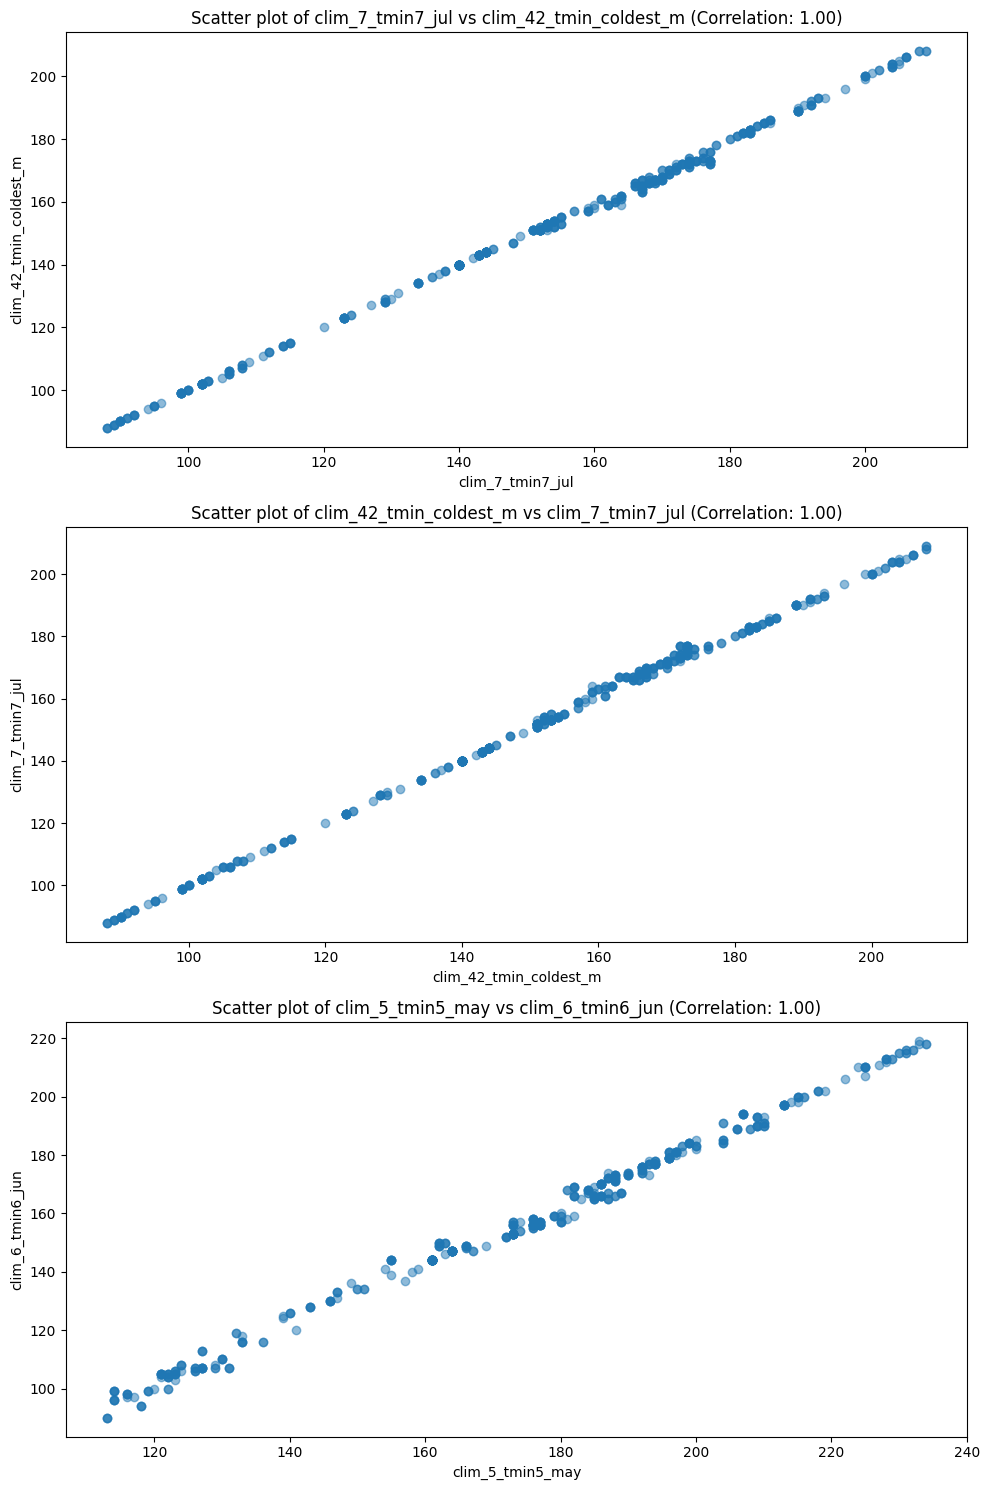

In [59]:
import matplotlib.pyplot as plt

# Select the top 3 strongest correlations
top_correlations = strong_correlations_filtered.unstack().dropna().abs().nlargest(3)

# Get the pairs of variables with the strongest correlations
top_correlated_pairs = top_correlations.index

# Generate scatter plots for the top 3 correlated pairs
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (var1, var2) in enumerate(top_correlated_pairs):
    axes[i].scatter(coffee_data[var1], coffee_data[var2], alpha=0.5)
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel(var2)
    axes[i].set_title(f'Scatter plot of {var1} vs {var2} (Correlation: {top_correlations[i]:.2f})')

plt.tight_layout()
plt.show()


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


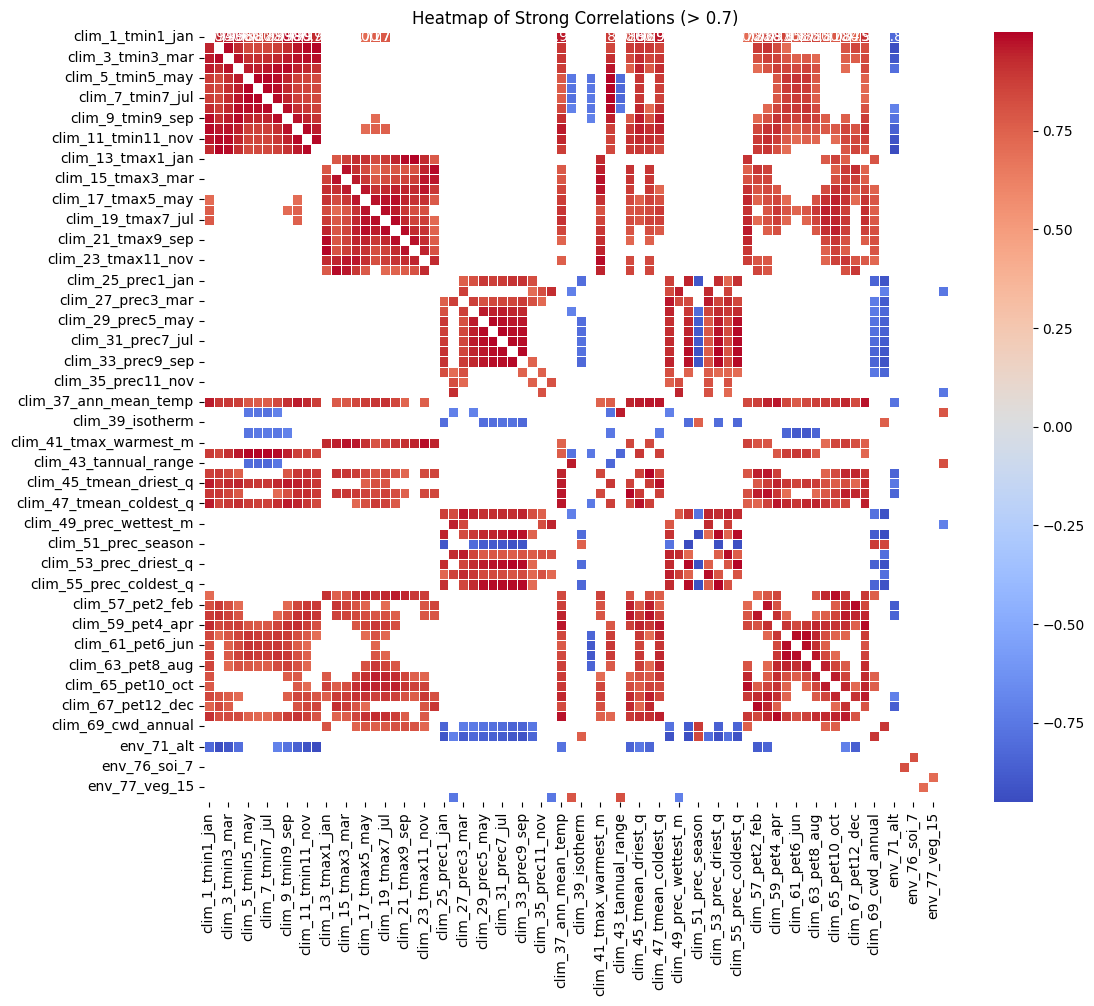

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 10))

# Generate the heatmap using seaborn
sns.heatmap(strong_correlations_filtered, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title and labels
plt.title('Heatmap of Strong Correlations (> 0.7)')
plt.show()


Since many attributes are correlated, we will reduce them